# Set e Fronzenset

- Set: sequenza mutabile
- Fronzenset: sequenza immutabile

In [2]:
{1, 2, 3, 2, 1} # sequenza ove gli elementi devono essere univoci

{1, 2, 3}

In [3]:
set('abracadabra')

{'a', 'b', 'c', 'd', 'r'}

In [4]:
frozenset('abracadabra')

frozenset({'a', 'b', 'c', 'd', 'r'})

In [5]:
# Tra tutte i metodi di set solo copy() è supportato da fronzenset, dato che gli altri metodi mutano il set

# Grafici

```python
pip install pygal
```

In [ ]:
import pygal

def draw_xy(title, xvals, yvals):
    """
    Draw xy plot with given x and y values.
    """
    coords = [(xval, yval) for xval, yval in zip(xvals, yvals)]
    xyplot = pygal.XY(height=400)
    xyplot.title = title
    xyplot.add("Data", coords)
    xyplot.render_in_browser()

xvals = [0, 1, 3, 5, 6, 7, 9, 11, 12, 15]
yvals = [4, 3, 1, 2, 2, 4, 5, 2, 1, 4]

draw_xy("My XY Plot", xvals, yvals)


## matplotlib (recommended)

```python
import matplotlib.pyplot as plt
```

Raccolta di funzioni che fanno funzionare matplotlib come MATLAB

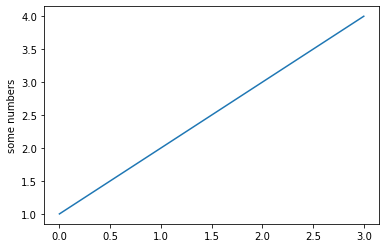

In [10]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

Se matplotlib fosse limitato a lavorare con gli elenchi, sarebbe abbastanza inutile per l'elaborazione numerica. 
Generalmente, si usano array numpy. 
In effetti, tutte le sequenze vengono convertite internamente in array numpy.

```python
import numpy as np
import matplotlib.pyplot as plt
```

# Pandas

La libreria Pandas viene utilizzata per analisi dei dati.

```python
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
```

In [11]:
# Il set di dati consisterà in 5 nomi di bambini e il numero di nascite registrate per quell'anno (1880).

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

# Per unire questi due elenchi insieme useremo la funzione zip.

BabyDataSet = list(zip(names,births))
print(BabyDataSet)


[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


---

['Mary', 'Jessica', 'Jessica', 'Bob', 'Jessica', 'Jessica', 'Jessica', 'Mary', 'Mary', 'Mary']
[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]
     Names  Births
0     Mary     968
1  Jessica     155
2  Jessica      77
3      Bob     578
4  Jessica     973
5  Jessica     124
6  Jessica     155
7     Mary     403
8     Mary     199
9     Mary     191
Mary
Jessica
Bob
John
Mel
count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object
         Births
Names          
Bob      106817
Jessica   97826
John      90705
Mary      99438
Mel      102319
         Births
Names          
Bob      106817
Mel      102319
Mary      99438
Jessica   97826
John      90705
       Births
Names        
Bob    106817


<AxesSubplot:xlabel='Names'>

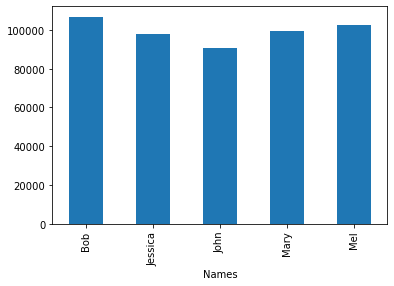

In [12]:
import pandas as pd
from numpy import random

names = ['Bob','Jessica','Mary','John','Mel']

random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

print(random_names[:10])

births = [random.randint(low=0,high=1000) for i in range(1000)]
print(births[:10])

BabyDataSet = list(zip(random_names,births))
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
print(df[:10])

df['Names'].unique()

for x in df['Names'].unique():
    print(x)

print(df['Names'].describe())

name = df.groupby('Names')

df = name.sum()
print(df)

Sorted = df.sort_values(['Births'], ascending=False)
print(Sorted)
print(Sorted.head(1))

df['Births'].plot.bar()


---

In [13]:
import pandas as pd

d = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df = pd.DataFrame(data=d, columns=['Numbers'])

print(df)

    Numbers
0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10


In [14]:
df['Numbers'] = df['Numbers'] + 1
print(df)

    Numbers
0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10
10       11


---

In [15]:
import pandas as pd

d = {'one':[1,1],'two':[2,2]}
i = ['a','b']

# Create dataframe
df = pd.DataFrame(data = d, index = i)
print(df)

print(df.index)

   one  two
a    1    2
b    1    2
Index(['a', 'b'], dtype='object')


In [16]:
stack = df.stack()
print(stack)
print(stack.index) # Doppia indicizzazione

a  one    1
   two    2
b  one    1
   two    2
dtype: int64
MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           )


In [18]:
transpose = df.T
print(transpose)

     a  b
one  1  1
two  2  2


---

In [20]:
import pandas as pd
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a', 'b', 'b', 'c']}
df = pd.DataFrame(d)
print(df)

   one  two letter
0    1    2      a
1    1    2      a
2    1    2      b
3    1    2      b
4    1    2      c


In [22]:
one = df.groupby('letter')
print(one.sum())

        one  two
letter          
a         2    4
b         2    4
c         1    2


In [23]:
letterone = df.groupby(['letter','one']).sum()
print(letterone)
print(letterone.index)

            two
letter one     
a      1      4
b      1      4
c      1      2
MultiIndex([('a', 1),
            ('b', 1),
            ('c', 1)],
           names=['letter', 'one'])


In [24]:
letterone = df.groupby(['letter','one'], as_index=False).sum()
print(letterone)

  letter  one  two
0      a    1    4
1      b    1    4
2      c    1    2


# Animazioni

Esistono due modi per creare animazioni utilizzando  Matplotlib: 
- Utilizzo della funzione pause() 
- Utilizzo della funzione FuncAnimation() 

## Pause()

In [ ]:
from matplotlib import pyplot as plt
  
x = []
y = []
  
for i in range(100):
    x.append(i)
    y.append(i)
  
    plt.xlim(0, 100)
    plt.ylim(0, 100)
      
    
    plt.plot(x, y, color = 'green')
    plt.pause(0.01)
  
plt.show() # visualizzazione non è ottimale su Jupyter Notebook

## FuncAnimation()

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
  
x = []
y = []
figure, ax = plt.subplots()
  
# Setting limits for x and y axis
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)
  
# Since plotting a single graph
line,  = ax.plot(0, 0) 
  
def animation_function(i):
    x.append(i * 15)
    y.append(i)  
    line.set_xdata(x)
    line.set_ydata(y)
    return line,
  
animation = FuncAnimation(figure, func = animation_function, frames = np.arange(0, 10, 0.1), interval = 10)
plt.show()
